# Neural Networks and Natural Language Processing
This project yses machine learning and artificial intelligence to explore the use of neural networks and natural language processing (NLP). I will create a neural network designed to learn word usage and context using NLP techniques. Visualizations and reporting will also be utilized to create a dependable neural network. 

## Competencies 
__Constructing Neural Networks__ <br>
Builds neural networks in the context of machine-learning modeling.

__Natural Language Processing__ <br>
Extracts insights from text data using effective and appropriate Natural Language Processing (NLP) models.

## Write Up 
__Research Question__ <br>
By examining previous customer reviews, how reliably can we predict future consumer sentiments to increase overall customer satisfaction?

__Goals__ <br>
By using neural networks and natural language processing, our goal is to better understand consumer sentiments through the analysis of past reviews. This will allow more accurate predictions for future consumer sentiments. 

__Type of Neural Network__ <br>
A type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set is recurrent neural networks (RNN). First, a “neural network is a series of algorithms that endeavor to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.” (Elleh, 2021) RNN deals with sequential data and can process text data and formulate predictions.  


# Code

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import re


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import nltk
nltk.download('punkt')
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\Makayla
[nltk_data]     Avendano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Makayla
[nltk_data]     Avendano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Makayla
[nltk_data]     Avendano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Importing all data sets into seperate data frames 
df_imdb = pd.read_csv("C:/Users/Makayla Avendano/Downloads/sentiment labelled sentences/imdb_labelled.txt", sep="\t", 
                      header=None, names=['review', 'rating'])
df_amazon = pd.read_csv("C:/Users/Makayla Avendano/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt", sep="\t", 
                        header=None, names=['review', 'rating'])
df_yelp = pd.read_csv("C:/Users/Makayla Avendano/Downloads/sentiment labelled sentences/yelp_labelled.txt", sep="\t", 
                      header=None, names=['review', 'rating'])

In [3]:
# Combine into one data frame 
df_all = pd.concat([df_imdb, df_amazon, df_yelp], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2748 non-null   object
 1   rating  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [4]:
df_all.shape

(2748, 2)

In [5]:
df_all['rating'].unique()

array([0, 1], dtype=int64)

In [6]:
# Missing Values 
# Sum of all null values within each column 
df_all.isnull().sum()

review    0
rating    0
dtype: int64

In [7]:
# NA Values 
# Sum of all null values within each column  
df_all.isna().sum()

review    0
rating    0
dtype: int64

In [8]:
# Uppercase letters 
df_all['review'] = df_all['review'].str.lower()

# Presence of Unusual Characters 
A library of specific characters was removed, and punctuation was removed through regex. List of characters before and after non-English characters were removed in the photos below. 

In [9]:
# Character count in python - before 
commentary = df_all['review']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['a', ' ', 'v', 'e', 'r', 'y', ',', 's', 'l', 'o', 'w', '-', 'm', 'i', 'n', 'g', 'b', 'u', 't', 'd', 'f', '.', 'h', 'c', 'k', 'p', '&', 'x', "'", 'j', '"', '\x96', '\t', '1', '\n', 'z', '?', 'q', '0', '3', ';', '/', '2', '9', ':', '*', 'é', '(', ')', '!', '$', '7', '5', '\x85', '8', '+', '%', '4', 'å', '6', '\x97', '#', '[', ']', 'ê']


In [10]:
# Punctuation marks 
df_all['review'] = df_all['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove specific characters
extra_characters = ['\t', '\n', 'é', '\x85', 'å', 'ê']
for char in extra_characters:
    df_all['review'] = df_all['review'].str.replace(char, '')

In [11]:
# Non-English characters 
description_list = []
for description in df_all.review: 
    description = re.sub("[^a-zA-z]", " ", description)

In [12]:
# Character count in python - after
commentary = df_all['review']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['a', ' ', 'v', 'e', 'r', 'y', 's', 'l', 'o', 'w', 'm', 'i', 'n', 'g', 'b', 'u', 't', 'd', 'f', 'h', 'c', 'k', 'p', 'x', 'j', '1', 'z', 'q', '0', '3', '2', '9', '7', '5', '8', '4', '6']


In [13]:
pd.set_option('display.max_colwidth', 5000)
df_all.head(5)

,review,rating
0,a very very very slowmoving aimless movie about a distressed drifting young man,0
1,not sure who was more lost the flat characters or the audience nearly half of whom walked out,0
2,attempting artiness with black white and clever camera angles the movie disappointed became even more ridiculous as the acting was poor and the plot and lines almost nonexistent,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo is trying to find a song that keeps running through his head,1


In [14]:
# Remove stop words
description_list = []
stop_words = set(stopwords.words('english'))

for description in df_all['review']:
    words = description.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_description = ' '.join(filtered_words)
    description_list.append(filtered_description)

df_all['review'] = description_list

print(df_all)

                                                                                                                                        review  \
0                                                                                       slowmoving aimless movie distressed drifting young man   
1                                                                                        sure lost flat characters audience nearly half walked   
2     attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent   
3                                                                                                                  little music anything speak   
4                                                                                 best scene movie gerardo trying find song keeps running head   
...                                                                                                                         

In [15]:
# Lemmatization 
lemma_word = []
wordnet_lemmatizer = WordNetLemmatizer()

for description in df_all['review']:
    words = description.split()
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in words]
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in lemmatized_words]
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos="a") for word in lemmatized_words]
    lemma_description = ' '.join(lemmatized_words)
    lemma_word.append(lemma_description)

df_all['review'] = lemma_word

In [16]:
# Word Embedding length 
# Determine min, med, max lengths of reviews 
review_length = []

for char_len in df_all.review: 
    review_length.append(len(char_len.split(" ")))
    review_max = np.max(review_length) 
    review_min = np.min(review_length) 
    review_median = np.median(review_length) 
    
print("Max length of sentence is:", review_max)
print("Min length of sentence is:", review_min)
print("Median length of sentence is:", review_median)

Max length of sentence is: 757
Min length of sentence is: 1
Median length of sentence is: 5.0


# Vocabulary Size and Tokenization 
“The primary goal of tokenization is to represent text in a manner that’s meaningful for machines without losing its context. By converting text into tokens, algorithms can more easily identify patterns.” (Awan, 2023) Tokenization also helps with formatting and text standardization. Through TensorFlow, we will use the Keras API and the tokenizer class to tokenize our data.

In [17]:
# Vocabulary Size - Tokenization 
# Identify vocab size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_all['review'])
df_all['review'] = tokenizer.texts_to_sequences(df_all['review'])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: ", vocab_size)

Vocabulary size:  4426


# Word Embedding Length
Embedding length was found by taking the fourth root of the vocab size and rounding up to the nearest integer. (Elleh, 2021) Embedding length is equal to 8. 

In [18]:
# Max sequence embedding 
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
print("Maximum sequence length: ", max_sequence_embedding)

Maximum sequence length:  8


# Padding Process
Padding was used to standardize the length of sequences. Neural networks need the input to be the same shape and size for all input values within the given data set (Elleh, 2021). It is evident that each review is not the same size therefore padding is added to make all input values the same throughout the data set. Padding was added after tokenization and was included after the sequence. Padding after the text sequence was chosen due to no sentence having missing values in the beginning of the sentence, rather after the sentence.   

In [19]:
# Padding 
from keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(df_all['review'], padding='post', maxlen=review_max)

In [20]:
df_all.info

<bound method DataFrame.info of                                                                                        review  \
0                                                       [1849, 1850, 3, 1851, 1243, 624, 243]   
1                                                     [212, 266, 738, 36, 625, 739, 371, 470]   
2     [407, 1852, 193, 244, 547, 156, 740, 3, 48, 372, 24, 548, 53, 108, 109, 137, 245, 1853]   
3                                                                         [74, 179, 246, 741]   
4                                               [23, 79, 3, 1854, 58, 57, 338, 130, 307, 626]   
...                                                                                       ...   
2743                                                                 [29, 14, 242, 1194, 169]   
2744                                                                         [4422, 4423, 13]   
2745                                                                   [229, 176, 22, 13, 27]  

In [21]:
# Sentence after padding 
print("Here is the 1st sentence after tokenization and padding: ", padded_sequences[0])

Here is the 1st sentence after tokenization and padding:  [1849 1850    3 1851 1243  624  243    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    

In [22]:
# Splitting Data into train and test 
from sklearn.model_selection import train_test_split
X = padded_sequences
y = np.array(df_all['rating'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7, stratify=y)

X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size = 0.3, random_state = 7, stratify=y_train)


print(X_train.shape, X_test.shape, X_validation.shape)

(1346, 757) (825, 757) (577, 757)


In [32]:
df_all_padded = df_all.copy()
df_all_padded['review'] = list(padded_sequences)

In [34]:
# Export clean data with padding 
df_all_padded.to_csv("C:/Users/Makayla Avendano/Desktop/D213_Padding_clean.csv")

In [35]:
# Export clean data 
df_all.to_csv("C:/Users/Makayla Avendano/Desktop/D213_Clean_All.csv")

In [23]:
# Export padded training and test data with y train and test data 
pd.DataFrame(X_train).to_csv("C:/Users/Makayla Avendano/Desktop/X_train_D213_task2.csv")
pd.DataFrame(X_test).to_csv("C:/Users/Makayla Avendano/Desktop/X_test_D213_task2.csv")
pd.DataFrame(y_test).to_csv("C:/Users/Makayla Avendano/Desktop/y_test_D213_task2.csv")
pd.DataFrame(y_train).to_csv("C:/Users/Makayla Avendano/Desktop/y_train_D213_task2.csv")
pd.DataFrame(X_validation).to_csv("C:/Users/Makayla Avendano/Desktop/x_validation_D213_task2.csv")
pd.DataFrame(y_validation).to_csv("C:/Users/Makayla Avendano/Desktop/y_validation_D213_task2.csv")

In [24]:
# Building the model 
# Activation function 

activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'adam'

num_epochs = 40
embedding_dim = 64

# Early stopping monitor 
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2) 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=int(review_max)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation=activation)
])

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 757, 64)           283264    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 294865 (1.12 MB)
Trainable params: 294865 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [25]:
# Training the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=32, epochs=num_epochs)

Epoch 1/40
43/43 [==============================] - 1s 13ms/step - loss: 0.6941 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 2/40
43/43 [==============================] - 0s 10ms/step - loss: 0.6935 - accuracy: 0.4614 - val_loss: 0.6931 - val_accuracy: 0.4958
Epoch 3/40
43/43 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 4/40
43/43 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.4673 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 5/40
43/43 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.4958
Epoch 6/40
43/43 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.4703 - val_loss: 0.6930 - val_accuracy: 0.5042
Epoch 7/40
43/43 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5052 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 8/40
43/

In [26]:
# Evaluation metric 
score = model.evaluate(X_test, y_test,verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6400107145309448 / Test accuracy: 0.7054545283317566


In [27]:
# Training the model - with early stopping 
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=32, epochs=num_epochs, callbacks=[early_stopping_monitor])

Epoch 1/40
43/43 [==============================] - 0s 10ms/step - loss: 0.2019 - accuracy: 0.9220 - val_loss: 0.5219 - val_accuracy: 0.7745
Epoch 2/40
43/43 [==============================] - 0s 10ms/step - loss: 0.1346 - accuracy: 0.9577 - val_loss: 0.6503 - val_accuracy: 0.7455
Epoch 3/40
43/43 [==============================] - 0s 9ms/step - loss: 0.1360 - accuracy: 0.9532 - val_loss: 0.5659 - val_accuracy: 0.7636


In [28]:
# Evaluation metric 
score = model.evaluate(X_test, y_test,verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5659159421920776 / Test accuracy: 0.7636363506317139


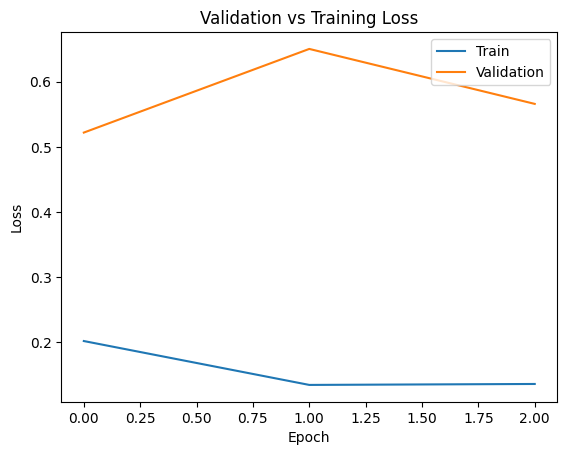

In [29]:
# Validation vs training data - comparing loss - with early stopping monitor 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Validation vs Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

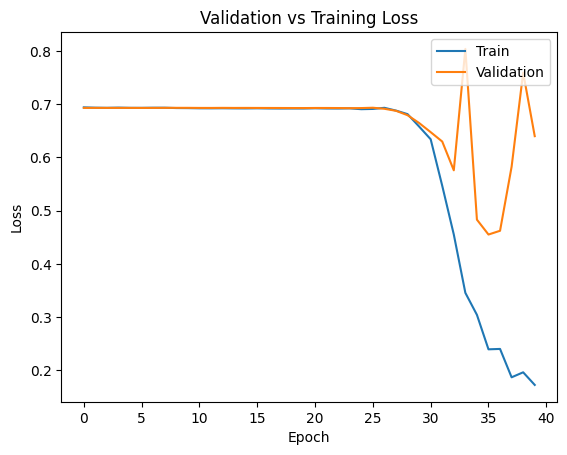

In [30]:
# Validation vs training data - comparing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Validation vs Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

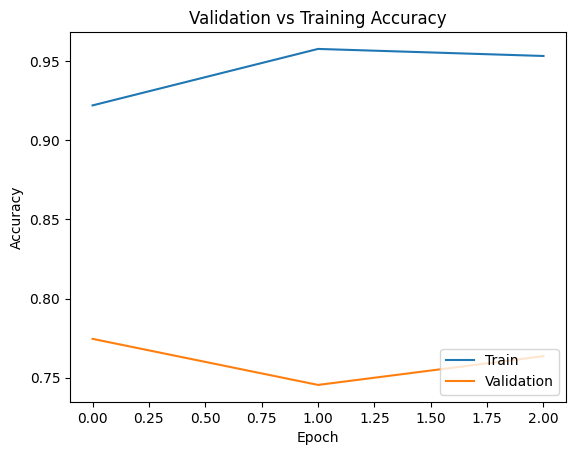

In [31]:
# Validation vs training data - comparing accuracy 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Validation vs Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

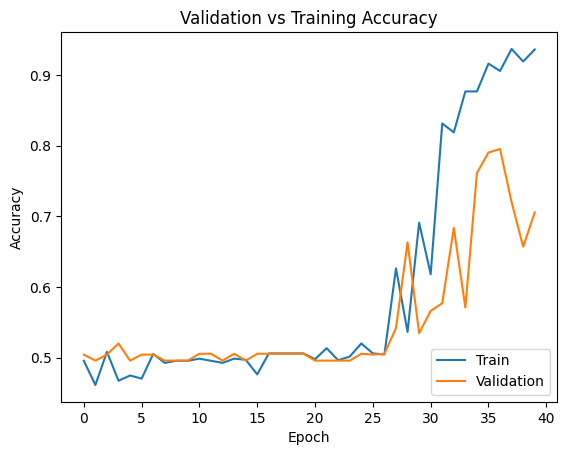

In [32]:
# Validation vs training data - comparing accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Validation vs Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

__Activation Function__<br>
“An activation function allows the model to capture non-linearities.” (Becker et al, n.d.) 
Rectified Linear Activation (ReLu) used for the hidden layers and the sigmoid activation function was used for the final output layer due to the output being binary. 

__Number of Nodes per layer__<br>
The number of nodes for our input layer is equal to our vocabulary size (4426). The number of nodes for our hidden layers are 100 and 50 nodes. Finally, our output layer has one node due to the sigmoid activation function and the binary nature of our data. 

__Loss Function__<br>
The loss function is binary cross entropy. This type of loss function was chosen due to this analysis being binary. “Binary cross entropy is good for classification analysis, for those whose rating sentiments operate a binary 1 or 0 classification.” (Elleh, 2021)

__Optimizer__ <br>
The “adam” optimizer was utilized in this neural network. The “adam” optimizer is one of the most popular optimizers in neural networks and helps reduce overfitting. 

__Stopping Criteria__<br>
Early stopping criteria is used to help improve the final model. This stopping criteria was paired with a patience value of 2 which means that the model will go only 2 epochs before the training is stopped. In total, 40 epochs were used as well. 

__Evaluation Metric__<br>
The evaluation metric used was accuracy. The model resulted in a test accuracy of approximately 0.7636 or 76.36%. 


# Functionality 
The functionality of the neural network relies heavily on several different structural factors. The model uses an input of 2748 reviews to train the model. Natural language processing (NLP) was used to break down customer reviews to be able to analyze the sentiments of the customers from the reviews. This was completed using lemmatization and tokenization to make the reviews readable within our model. Our final product was a functioning model and neural network that could perform predictions and analyze a negative or positive sentiment from future customer reviews. The network architecture was also important in creating a highly functioning neural network. The components that had a high impact on the network’s architecture include the activation function, loss function, and early stopping monitor.

- Activation function: The sigmoid activation function is optimized for binary output like our model. 
- Loss function: The binary cross entropy loss function is also optimized for binary output like our model and the sigmoid activation function. 
- Early stopping monitor: Early stopping with a patience level of 2 was used to help optimize the final model. 

These components allowed for an optimal model to be developed and a test accuracy of approximately 76.36%. 

# Recommendations 
A recommended course of action based on the results would be to congregate more data in order to further improve the data. Although the model allowed for an acceptable degree of accuracy, it can be further improved with a higher number of input values. 